In [47]:
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

## Load statistics

In [48]:

FIGURE_OUTPUT_DIR = Path("output/figures/statistics")
FIGURE_OUTPUT_DIR.mkdir(exist_ok=True)

# To generate a new stats file run the script save_trajectory_proj_and_stats.py!
STATS_BASE_DIR = Path("output/statistics/hist/")

separated_mu = pd.read_csv(STATS_BASE_DIR / "tf100ms_2_separated_mu" / "all_fragments.csv")
classified_all = pd.read_csv(STATS_BASE_DIR / "tf100ms_2024-08-07_15-43-43" / "all_fragments.csv")

print(separated_mu.columns)
print(classified_all.columns)

display(classified_all.head())
display(classified_all.count())

Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s'],
      dtype='object')
Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s'],
      dtype='object')


,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s
0,mu-3,0,0,bee,217225,30.25,2748,0.1
1,mu-3,0,1,bee,217225,30.25,1602,0.1
2,mu-3,0,2,bee,217225,30.25,881,0.1
3,mu-3,0,3,bee,217225,30.25,977,0.1
4,mu-3,0,4,bee,217225,30.25,690,0.1


scene              8266
instance_id        8266
fragment_id        8266
class              8266
traj_evnt_count    8266
traj_len_s         8266
frag_evnt_count    8266
frag_len_s         8266
dtype: int64

In [49]:
# clear class names for datasets not yet classified
separated_mu["class"] = "unclassified"
display(separated_mu.head())

,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s
0,1_l-l-l,0,0,unclassified,1015970,40.43,43,0.1
1,1_l-l-l,0,1,unclassified,1015970,40.43,14,0.1
2,1_l-l-l,0,2,unclassified,1015970,40.43,290,0.1
3,1_l-l-l,0,3,unclassified,1015970,40.43,630,0.1
4,1_l-l-l,0,4,unclassified,1015970,40.43,450,0.1


In [50]:
# Combine dataframes
classified_scenes = classified_all["scene"].unique()
df = separated_mu[~separated_mu["scene"].isin(classified_scenes)]
print(df["scene"].unique())
df = pd.concat([df, classified_all])
print("all fragments", len(df.index))

# combine all
# df = pd.concat([combined_mu, classified_pf])
# display(df["scene"].unique())
# print("Total fragment count:", len(df))

['1_l-l-l' '2_l-h-l' '3_m-h-h' '4_m-m-h' '5_h-l-h' '6_h-h-h_filtered']
all fragments 14649


## Class overview
### Number of trajectories per class

class
bee              65
bumblebee         5
butterfly        22
dragonfly       112
insect           70
unclassified    218
wasp             21
dtype: int64

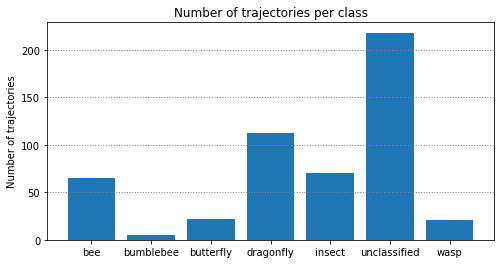

In [51]:
# gesucht: Anzahl instances pro Klasse
# group by class
# unique over scene and instance_id
df1 = df.groupby("class").apply(lambda x: len(x[["scene", "instance_id"]].drop_duplicates()))
display(df1)

plt.figure(figsize=(8,4))
plt.bar(df1.index, df1)
plt.title("Number of trajectories per class")
plt.ylabel("Number of trajectories")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of trajectories per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

### Number of fragments per class (all)

class
bee             3671
bumblebee        206
butterfly       1078
dragonfly       2160
insect           527
unclassified    6383
wasp             624
dtype: int64

total fragments: 14649


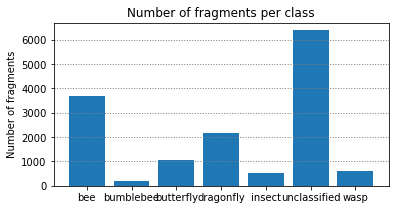

In [63]:
df1 = df.groupby("class").size()
display(df1)
print("total fragments:", df1.sum())

plt.figure(figsize=(6,3))
plt.bar(df1.index, df1)
plt.title("Number of fragments per class")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of fragments per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

### Number of fragments per class (>= 1024)

class
bee              594
bumblebee         98
butterfly        389
dragonfly       1366
insect           176
unclassified    1183
wasp             100
dtype: int64

3906

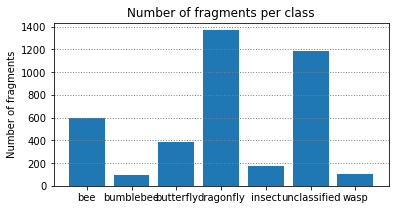

In [53]:
df1 = df[df["frag_evnt_count"] >= 1024].groupby("class").size()
display(df1)
display(df1.sum())

plt.figure(figsize=(6,3))
plt.bar(df1.index, df1)
plt.title("Number of fragments per class")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of fragments per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

### Number of fragments per class (>= 2048)

class
bee             312
bumblebee        60
butterfly       225
dragonfly       899
insect          110
unclassified    866
wasp             23
dtype: int64

2495

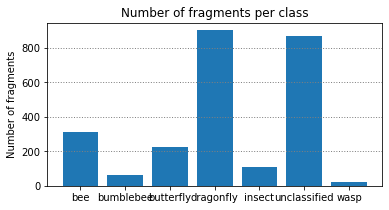

In [54]:
df1 = df[df["frag_evnt_count"] >= 2048].groupby("class").size()
display(df1)
display(df1.sum())

plt.figure(figsize=(6,3))
plt.bar(df1.index, df1)
plt.title("Number of fragments per class")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of fragments per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

### Number of fragments per class (>= 4096)

class
bee             125
bumblebee        18
butterfly        84
dragonfly       406
insect           56
unclassified    592
wasp              6
dtype: int64

1287

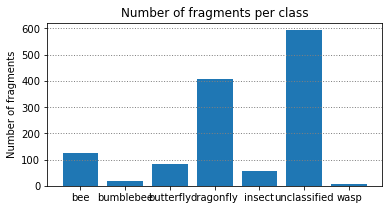

In [55]:
df1 = df[df["frag_evnt_count"] >= 4096].groupby("class").size()
display(df1)
display(df1.sum())

plt.figure(figsize=(6,3))
plt.bar(df1.index, df1)
plt.title("Number of fragments per class")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of fragments per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

In [56]:
df0 = df[["traj_evnt_count","traj_len_s","frag_evnt_count","frag_len_s"]]

df1 = df0.mean()
print("Mean overall values (all fragments)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 2048].mean()
print("Mean overall values (>= 2048)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 4096].mean()
print("Mean overall values (>= 4096)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 4096].median()
print("Median overall values (>= 4096)")
display(df1)

Mean overall values (all fragments)


traj_evnt_count    185321.23
traj_len_s             15.23
frag_evnt_count      2155.80
frag_len_s              0.10
dtype: float64

Mean overall values (>= 2048)


traj_evnt_count    360557.25
traj_len_s             11.01
frag_evnt_count     10988.96
frag_len_s              0.10
dtype: float64

Mean overall values (>= 4096)


traj_evnt_count    492104.87
traj_len_s              9.98
frag_evnt_count     18563.82
frag_len_s              0.10
dtype: float64

Median overall values (>= 4096)


traj_evnt_count    250757.00
traj_len_s              5.99
frag_evnt_count      7948.00
frag_len_s              0.10
dtype: float64

In [57]:

df1 = df.groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
print("Mean stats per class (all fragments)")
display(df1)

df2 = df[df["frag_evnt_count"] >= 2048].groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
print("Mean stats per class (>= 2048)")
display(df2)

df3 = df[df["frag_evnt_count"] >= 4096].groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
print("Mean stats per class (>= 4096)")
display(df3)

Mean stats per class (all fragments)


,traj_evnt_count,traj_len_s,frag_evnt_count
class,,,
bee,138120.10,19.38,627.35
bumblebee,149701.45,12.10,1543.69
butterfly,101126.30,8.35,2152.59
dragonfly,169261.83,9.07,2698.74
insect,37563.88,1.43,3355.21
unclassified,259437.26,18.11,2924.89
wasp,42450.95,7.40,595.74


Mean stats per class (>= 2048)


,traj_evnt_count,traj_len_s,frag_evnt_count
class,,,
bee,337098.01,23.60,4391.68
bumblebee,115347.43,8.87,3558.58
butterfly,136495.85,6.84,8128.64
dragonfly,182704.24,6.90,5360.34
insect,95363.44,1.16,14334.35
unclassified,670806.06,13.34,20248.54
wasp,48878.61,6.53,3210.48


Mean stats per class (>= 4096)


,traj_evnt_count,traj_len_s,frag_evnt_count
class,,,
bee,430123.60,24.45,6675.86
bumblebee,100973.50,7.52,4879.06
butterfly,168271.64,6.18,16847.99
dragonfly,176130.93,5.95,8257.96
insect,139978.57,0.61,25398.82
unclassified,817348.67,11.19,28294.56
wasp,67133.83,9.19,4775.50


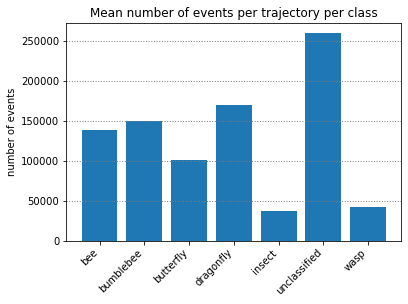

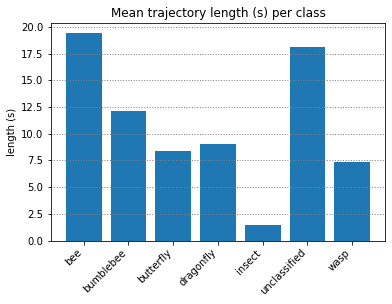

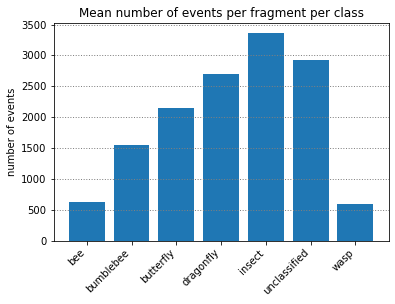

In [58]:
plt.bar(df1.index, df1["traj_evnt_count"])
plt.title("Mean number of events per trajectory per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("number of events")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

plt.bar(df1.index, df1["traj_len_s"])
plt.title("Mean trajectory length (s) per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("length (s)")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

plt.bar(df1.index, df1["frag_evnt_count"])
plt.title("Mean number of events per fragment per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("number of events")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


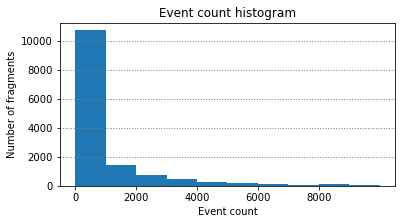

In [59]:
plt.figure(figsize=(6,3))
plt.hist(df["frag_evnt_count"], bins=list(range(0, 1000*10+1, 1000)))
plt.title("Event count histogram")
plt.xlabel("Event count")
plt.xticks(np.arange(0, 1000*10, 2000))
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Event count histogram 2.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

In [60]:
df1 = df[df["frag_evnt_count"] >= 4096 ]["scene"].count()
print("Number of fragments over all scenes with >= 4096 events:", df1)

df1 = df[df["frag_evnt_count"] >= 4096//2 ]["scene"].count()
print("Number of fragments over all scenes with >= 2048 events:", df1)

Number of fragments over all scenes with >= 4096 events: 1287
Number of fragments over all scenes with >= 2048 events: 2495


scene
1_l-l-l             1112
2_l-h-l              590
3_m-h-h             3075
4_m-m-h              518
5_h-l-h               61
6_h-h-h_filtered    1027
hn-bee-1             610
hn-but-2            1213
hn-dra-1             216
hn-was-1              70
hn-was-2             327
hn-was-3             227
mb-bum2-2            582
mb-dra1-1            518
mb-dra2-1           1428
mu-3                3075
dtype: int64

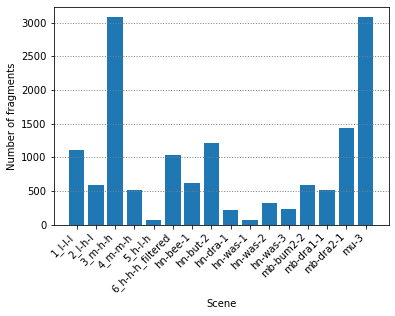

In [61]:
# number of fragments per scene
df1 = df.groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Scene")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


scene
1_l-l-l             430
2_l-h-l             110
3_m-h-h             269
4_m-m-h              25
6_h-h-h_filtered     32
hn-bee-1             15
hn-but-2            286
hn-dra-1             98
hn-was-1              2
hn-was-2              9
hn-was-3             12
mb-bum2-2           135
mb-dra1-1           266
mb-dra2-1           537
mu-3                269
dtype: int64

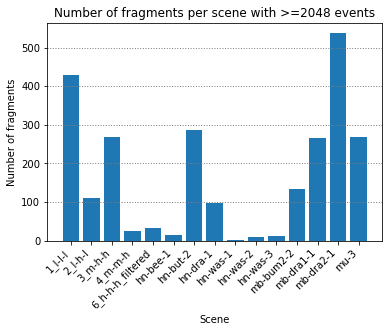

scene
1_l-l-l             373
2_l-h-l              75
3_m-h-h             118
4_m-m-h               4
6_h-h-h_filtered     22
hn-bee-1              3
hn-but-2            121
hn-dra-1             46
hn-was-2              3
hn-was-3              3
mb-bum2-2            39
mb-dra1-1           133
mb-dra2-1           229
mu-3                118
dtype: int64

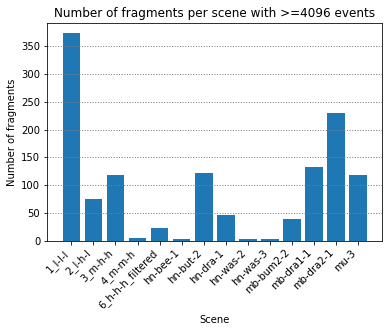

In [64]:
# number of fragments per scene WHERE >= 2048
df1 = df[df["frag_evnt_count"] >= 4096//2 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=2048 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

# number of fragments per scene WHERE >= 4096
df1 = df[df["frag_evnt_count"] >= 4096 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=4096 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()